# <center>Financial News Sentiment Analysis:  Supervised Machine Learning versus BERT</center>

# 1 Problem Area

The area of industry that I have chosen to apply natural language processing (NLP) text classification, in particular, sentiment anaylsis, is the financial sector. The challenge of sentiment analysis of financial market news lies at the intersection of NLP and financial analysis. It addresses the need to extract actionable insights from the vast amount of textual data generated daily in financial markets. Solving this problem is crucial for retail and institutional investors and traders who rely on timely and accurate information regarding the market's sentiment, in order to make informed decisions on their investments and trades.

One of the primary difficulties in this domain is the complexity and ambiguity of financial language. Stock market news articles for example, often contain nuanced sentiments, speculative language, and domain and region specific terminology that can be challenging for sentiment analysis models. For instance, words like "bullish" and "bearish", carry different meanings depending on context. Understanding and classifying financial news sentiment is important as research has shown there is a link between financial news and stock volatility[1].

To tackle this challenge, researchers and practitioners have developed various text classification methods that leverage machine learning and NLP techniques. One of the key approaches is sentiment analysis, which aims to classify text into positive, negative, or neutral sentiments based on the underlying emotions expressed.

Prior work in this area has laid the foundation for sentiment analysis in financial texts. Researchers have explored different features and algorithms to improve sentiment classification accuracy. For example, sentiment lexicons specific to financial terms have been developed to enhance the understanding of sentiment-bearing words in financial contexts[2].

On top of that, recent advancements in deep learning, particularly with techniques like recurrent neural networks (RNNs) and transformer models, have shown promise in improving sentiment analysis accuracy by capturing dependencies in text[3].

In summary, the problem of sentiment analysis in financial market news presents a critical area where text classification methods can significantly contribute to the decisions investors and traders make. By building upon prior work in sentiment analysis and leveraging NLP techniques, I hope that my work can add to the importance of NLP in this sector.

# 2 Objectives

The objectives of building an NLP Text Classifier for analyzing financial market news sentiment are as follows:

 - <b><u>Objective 1:</u></b> Compare the performance between Supervised Learning versus BERT
 
     <u>Justification</u>: Statistical modeling using supervised machine learning[4] involves building models based on labeled training data, where the goal is to learn the relationship between input features and the corresponding output labels.
     
     BERT (Bidirectional Encoder Representations from Transformers)[5] is an embedding-based language model in NLP that analyzes text sequences from both direction of the body. 
     
     Evaluating how well traditional supervised learning models perform compared to BERT can highlight the strengths and weaknesses of each approach. This helps establish benchmarks and identify which models are more effective for financial sentiment analysis.
     
     <br>

  - <b><u>Objective 2:</u></b> Ascertain model applicability in the finance sector
  
    <u>Justification</u>: Traditional supervised learning models and BERT differ significantly in terms of computational complexity, training time, and resource requirements. Modern day AI tools like deep learning also has a large carbon footprint[6]. Comparing their performance can help understand the trade-offs between model accuracy and efficiency, guiding decisions based on available resources, environmental impact and project constraints.

    
The impact and significance of this project within the problem area of financial news sentiment analysis are as follows:

- Improved Decision-Making: The findings of this project can contribute to ascertain whether a deep learning based approach to classifying financial news is better than machine learning. This comparison is crucial as it can provide insights into which method yields more accurate predictions, thereby guiding financial institutions, investors, and analysts in making informed decisions based on sentiment analysis of news articles. 

The contribution of this projectc comes from adding validity and credibility to the findings of existing literature and research topic[7]. This ensures that the results are robust and applicable across different datasets and scenarios, providing a more comprehensive understanding of the comparative performance between supervised learning and BERT.

# 3 Dataset

The chosen dataset for this project comes from Kaggle[8]. The dataset comprises financial news headlines from the perspective of a retail investor, and is stored in a CSV file format, with a relatively small size of 657 kilobytes.

The dataset contains two columns:

- <b>Sentiment</b>: This column categorizes the sentiment of each news headline into three distinct types: positive, neutral, and negative. These sentiment labels serve as the known sentiment of the article headline.
<br>
<br>
- <b>News Headline</b>: This column contains the actual headlines of the news articles. It is textual data.

Both columns in the dataset are of string data type, which is common for text-based datasets in NLP tasks.

The labeled nature of this dataset makes it suitable for supervised machine learning approaches, which aligns with the project's objective of building a sentiment analysis classifier model. Supervised learning relies on having labeled data, where the features (in this case, the news headlines) are associated with corresponding labels (sentiments).

On overview of the dataset informs me that it may contain ambiguity, noise, special characters, or irregularities typical of real-world textual data. These aspects will need to be addressed through data preprocessing steps as part of the NLP pipeline. These preprocessing steps, which will be done in the later sections of this project, are crucial for preparing the dataset for feature extraction and building an effective sentiment analysis model.

# 4 Evaluation Methodology

To evaluate the classifier, the follow metrics will be used:

- <b>Accuracy Score</b>: It is how often a model is correct, overall.
- <b>Precision Score</b>: It is how often a model is correct at predicting the target classes.
- <b>Confusion Matrix</b> A N*N matrix to evaluate a classfication model, where N is the number of labels.
    
We utilize the accuracy score to measure how well our classifier is at analyzing a given set of article headlines. The higher the score, the better. This means that the classifier is correctly predicting whether an article is positive, neutral or negative, and can be relied upon and trusted when asked to measure new unseen data.

We utilize the precision score to measure how well our classifier is at analyzing each of the given target classes. This will allows us to detect if our classifier is weaker at classifying positive headlines over negative headlines, for example, and investigate further as to the cause for it. The higher the precision score, the better. This will imply the classifier is good at predicting each of the 3 classes, respectively.

The confusion matrix will provide a general overview of the performance of the classifier for each of the 3 target classes, and is a common practise in the field of machine learning classification models.

# 5 Preprocessing 

## 5.1 Data Cleaning & Transformation

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import re
import nltk

from nltk import FreqDist
from nltk.corpus import stopwords, wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize

from wordcloud import WordCloud

In [2]:
# for google colab
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('wordnet')

#import csv and load into pandas dataframe
# from google.colab import drive
# drive.mount('/content/drive')
#df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/all-data.csv",encoding='latin-1')

In [3]:
#import csv and load into pandas dataframe
df = pd.read_csv("all-data.csv",encoding='latin-1')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4845 entries, 0 to 4844
Data columns (total 2 columns):
 #   Column                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                           --------------  ----- 
 0   neutral                                                                                                                          4845 non-null   object
 1   According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .  4845 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [5]:
df.head()

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


The file appears to not have the actual column headings mentioned in '3 Dataset'. Lets address that first.

In [6]:
#extract the false formated column values
firstEntry = list(df.columns)

In [7]:
#MY ORIGINAL CODE/CONTRIBUTIONS

#rename columns
df = df.rename(columns={'neutral':'sentiment',
                        'According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .':'Headline'})

#append a new single row
addRow = {'sentiment':firstEntry[0],'Headline':firstEntry[1]}
df = df._append(addRow,ignore_index=True)

In [8]:
#column value is now in the last row
df.tail()

,sentiment,Headline
4841,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4842,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4843,negative,Net sales of the Paper segment decreased to EU...
4844,negative,Sales in Finland decreased by 10.5 % in Januar...
4845,neutral,"According to Gran , the company has no plans t..."


In [9]:
df.describe()

,sentiment,Headline
count,4846,4846
unique,3,4838
top,neutral,TELECOMWORLDWIRE-7 April 2006-TJ Group Plc sel...
freq,2879,2


Originally the file contained 4845 rows, but because we know that the first row was formatted as column headers, we renamed the columns, and added the back the extracted old header vaues. Thus, the row count increased by row, which is correct.

In [10]:
df.isnull().sum()

sentiment    0
Headline     0
dtype: int64

No missing values in our dataframe.

In the later sections of the project, a text classifier model will be built. To accomadate the model, I will tranform the labels into 3 numerical classes, whilst retaining the textual data of the headline to be processing by the model.

The 3 numerical classes will be:

<b>1</b>: positive sentiment

<b>0</b>: neutral sentiment

<b>-1</b>: negative sentiment

In [11]:
#MY ORIGINAL CODE/CONTRIBUTIONS

#replace the sentiment values based on condition
df['sentiment'] = df['sentiment'].apply(lambda val: {'positive': 1, 'neutral':0 ,'negative': 2}.get(val, ' '))

In [12]:
df.head()

,sentiment,Headline
0,0,Technopolis plans to develop in stages an area...
1,2,The international electronic industry company ...
2,1,With the new production plant the company woul...
3,1,According to the company 's updated strategy f...
4,1,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


## 5.2 Text Normalization

Converting all text to ASCII and lowercase helps standardize the text and ensures that the model doesn't treat "the" and "The" as different tokens. This step is vital in tasks where the case of the text doesn't carry significant meaning, such as sentiment analysis.

Punctuation marks like commas, periods, exclamation marks, etc., typically do not contribute directly to sentiment analysis and can add noise to the data. Removing them can help the model focus on meaningful words and improve accuracy.

We also remove digits as they do not add value to analyzing sentiment as well.

So the first step in the normalization process is addressing these two agendas. Regular Expression and built in Python string methods will be used.

In [13]:
#MY ORIGINAL CODE/CONTRIBUTIONS

def ascii_lower(str_):
    #this regex removes characters that come after an apostrophe,eg apple's -> apple
    reg = re.sub(r"'[a-z]+",'',str_)
    x = reg.encode("ascii", "ignore").decode()
    x = x.lower()
    return x

def removeDigits(str_):
    #replace all special characters, that is, everything that isnt a letter or digit
    reg = re.sub(r'[^A-Za-z ]+','',str_)
    return reg

#apply our function to the headline column
df['Headline'] = df['Headline'].apply(ascii_lower)
df['Headline'] = df['Headline'].apply(removeDigits)

In [14]:
df.tail()

,sentiment,Headline
4841,0,rinkuskiai beer sales fell by per cent to m...
4842,2,operating profit fell to eur mn from eur mn ...
4843,2,net sales of the paper segment decreased to eu...
4844,2,sales in finland decreased by in january wh...
4845,0,according to gran the company has no plans to...


The next step is our normalization process is to tokenize the headlines and remove common stopwords that add no value to the sentiment analysis. 

We also lemmatize our tokens to break them down into a more meaningful base form. This is known also as linguistically principled anaylsis. We choose this over stemming as stemming simply removes the last few characters to return a root word, and because the stock market news headlines can contain nuances statement that stemming cannot provide any value to.

For example, stemming "historical highs" would return "histori highs". Whereas lemmatization would return "historical highs". The word "historical" is of much more value than "histori", which is not a English word at all.

In [15]:
#MY ORIGINAL CODE/CONTRIBUTIONS

#we store our tokenized words from our headlines into a list, for visualization later
tokenizedData= []

#define lemmatization object
lt = WordNetLemmatizer()

#create our stopwords set
myStopWords = set(stopwords.words('english'))

def custom_tokenizer(headline):
    tokens = []
    for sent in sent_tokenize(headline):
        for word in word_tokenize(sent):
            if word not in myStopWords:
                tokenizedData.append(word)
                word = lt.lemmatize(word)
                tokens.append(word)
            
    newHeadline = ' '.join(tokens)
    return newHeadline

df['Updated_Headlines'] = df['Headline'].apply(custom_tokenizer)

In [16]:
df.head()

,sentiment,Headline,Updated_Headlines
0,0,technopolis plans to develop in stages an area...,technopolis plan develop stage area le square ...
1,2,the international electronic industry company ...,international electronic industry company elco...
2,1,with the new production plant the company woul...,new production plant company would increase ca...
3,1,according to the company updated strategy for...,according company updated strategy year baswar...
4,1,financing of aspocomp s growth aspocomp is agg...,financing aspocomp growth aspocomp aggressivel...


We now have our updated headlines, where the textual data is in lowercase ascii, containing no digits and special characters, common stopwords removed and remaining words lemmatized. I will go ahead and drop the old headline column,

In [17]:
df = df.drop('Headline',axis=1)
df = df.rename(columns={'Updated_Headlines':'Headlines'})

## 5.3 Visualizing the data

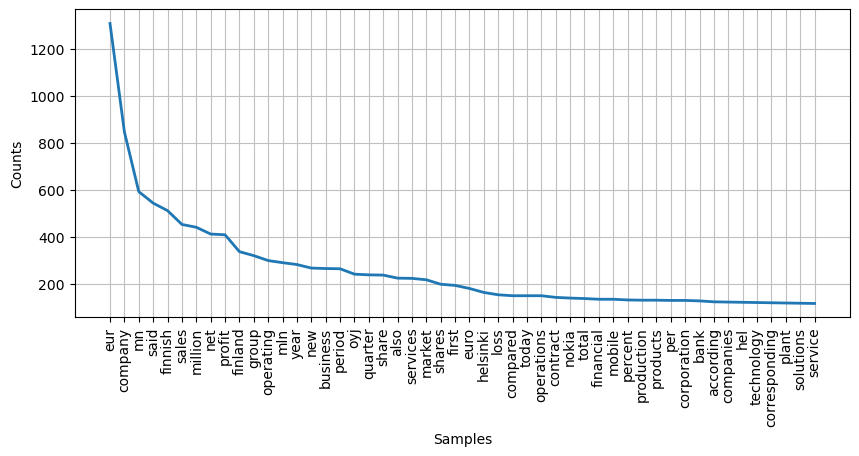

<Axes: xlabel='Samples', ylabel='Counts'>

In [18]:
#frequncy diagram of the most common tokens in our dataset
FreqData = FreqDist(w for w in tokenizedData)
plt.figure(figsize=(10,4))
FreqData.plot(50)

Based on the frequency distribution plot, it appears that a significant portion of the financial headlines originates from Europe, specifically focusing on the European market, and Finland seems to be at the core of these news articles.

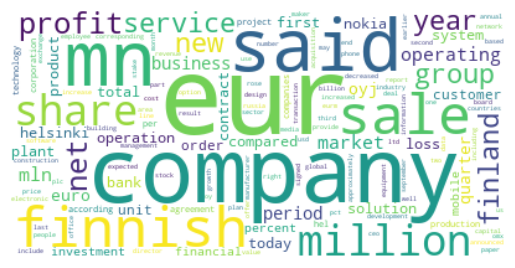

In [19]:
#MY ORIGINAL CODE/CONTRIBUTIONS
word_Cloud_Text = " ".join(tokenizedData)

#plotting a word using the WordCloud library
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(word_Cloud_Text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The above word cloud provides a more visual and readable representation of the frequency distribution diagram.

In [20]:
#MY ORIGINAL CODE/CONTRIBUTIONS

#plotting a bar chart with matplotlib
def plot_uniqueCounts(df):
    fig, ax = plt.subplots()

    yAxisVal = ['neutral','positive','negative']
    xAxisVal = df.sentiment.value_counts()
    barColors = ['grey','red','green']

    ax.barh(yAxisVal, xAxisVal, align='center',color=barColors)
    ax.invert_yaxis()
    ax.set_title('Count of Sentiment')

    plt.show()

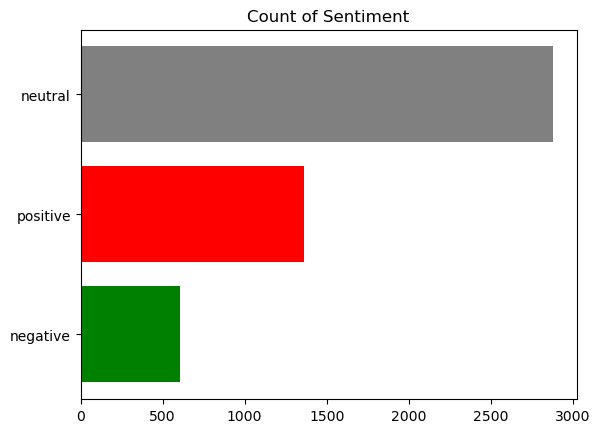

In [21]:
plot_uniqueCounts(df)

In [22]:
df['sentiment'].value_counts()

sentiment
0    2879
1    1363
2     604
Name: count, dtype: int64

From the above bar chart, we can see that we have an imbalanced number of classes in our dataset. A skewed distribution, where majority of the sample counts are of neutral sentiment. Therefore, we need to balance out the classes in order to prevent any bias when training the model. On top of that, techniques like cross validation must be utilized to prevent overfitting.

In order to balance out the classes, random under sampling will be used.

In [23]:
np.random.seed(5)

remove_n = 1500
neutralIndex = df[df['sentiment'] == 0].index
drop_indices = np.random.choice(neutralIndex, remove_n, replace=False)
df_subset = df.drop(drop_indices)

In [24]:
df_subset['sentiment'].value_counts()

sentiment
0    1379
1    1363
2     604
Name: count, dtype: int64

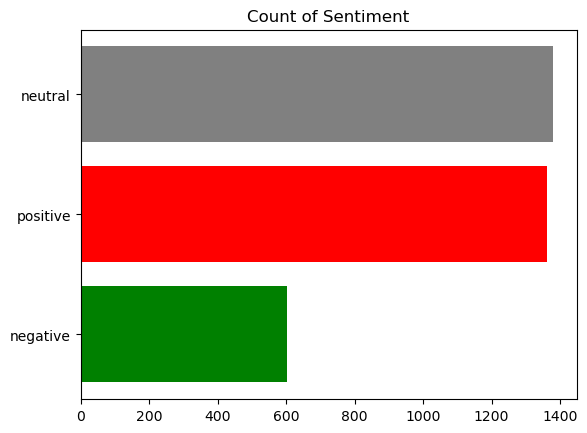

In [25]:
plot_uniqueCounts(df_subset)

## 5.5 Statistical Model Text Representation

For this project, I have chosen the Bag of Words Model to represent the textual data for the supervised machine learning model. The reason for this choice are as follows:

- Simplicity and Efficiency: The BoW model is relatively simple to implement and understand. It represents text data as a collection of words without considering the order or structure of the sentences. This simplicity makes it computationally efficient and scalable
<br>

- Suitability for Classification: The BoW model is well-suited for classification tasks, where the goal is to assign labels to input text data, this case, the financial news headlines and its respective sentiment. It works effectively with classifiers like Naive Bayes, Support Vector Machines (SVM), and Random Forests, making it a versatile choice for sentiment analysis.

Prepare the train test split for our model. Train-test split is a technique in machine learning where the dataset is divided into a training set, used to train the model, and a testing set, used to evaluate the model's performance on unseen data, helping assess its generalization capabilities and potential overfitting issues.

In [26]:
from sklearn.model_selection import train_test_split
#using sklearn's train_test_split

#convert the headlines and sentiment column values into a list
features = df_subset['Headlines'].tolist() 

labels = df_subset['sentiment'].tolist()

X_train,X_test,y_train,y_test = train_test_split(features,labels,test_size=0.2,random_state=7)

In [27]:
#import's sklearn's CounteVectorizer to build the BoW
from sklearn.feature_extraction.text import CountVectorizer

count_Vect = CountVectorizer(stop_words='english')
supervised_X_train = count_Vect.fit_transform(X_train)
supervised_X_test = count_Vect.transform(X_test)

## 5.6 Embedding Model Text Representation

Preparing and representing the text data for a deep learning model like BERT is slightly different than a traditional supervised model. 


We need to prepare <b>three sets of data for deep learning</b>.


1. Training Set: Subset of the data used to train the model. 


2. Validation Set: Subset of the data used to tune the model's hyperparameters and to monitor its performance during training.


3. Test Set: Subset of unseen data, used to evaluate the final model's performance.

To convert our raw textual data into a form that can be accepted by the BERT model, we need to utilizer the BertTokenizer. The BertTokenizer...

In [28]:
from transformers import BertTokenizer

#Tokenize and encode the data using the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Below is the training, validation and test splits for the production model.

In [29]:
#this is the train and validation split
bert_X_train,bert_X_val,bert_y_train,bert_y_val=train_test_split(df['Headlines'], df['sentiment'], test_size=0.15, random_state=42)

#this is the test split
_,bert_X_test,_,bert_y_test=train_test_split(bert_X_train, bert_y_train, test_size=0.1, random_state=42)

print("train_text shape: ",bert_X_train.shape)
print("val_text shape:",bert_X_val.shape)
print("test_text shape: ",bert_X_test.shape)

train_text shape:  (4119,)
val_text shape: (727,)
test_text shape:  (412,)


To perform training, validation and testing for test models, we also need to convert our features and labels to numpy array as well, instead of a list, in order to perform k fold cross validation.

In [30]:
#pandas to np.array
deep_X = df_subset['Headlines'].to_numpy()
deep_y = df_subset['sentiment'].to_numpy()

#testing testing models
_, kfold_X_Test,_,kfold_y_Test = train_test_split(deep_X,deep_y,test_size=0.10,random_state=42)

# 6 Baseline performance

To have a baseline peroformance to compare the models to, I will be adopting two approaches. 

1. The first is to review the current literature, where the performance of superivsed machine learning and deep learning models in financial sentiment analysis has been measured, and use that as my first baseline.

    <b>Justification</b>: Using a baseline from published literature ensures that the comparison of performance later on, is against a widely accepted standard. This enhances the credibility of the work. On top of that, published works are typically derived from various real-world dataset, ensuring the benchmark is relevant to practical applications.
    <br>

2. The second is to form a random baseline of my own.

    <b>Justification</b>: It is simple to implement and replicate, furthermore, it sets a minimum and realistic expectation for model performance. If either models cannot beat a random baseline, then it indicates a larger problem with the project as a whole.
    
## Statistical Model Baselines

This study done by Savas and colleagues[9], used data from Stocktwits, a social media platform for investors, for sentiment analysis. They built a multinomial naive bayes model with accuracy score of 76.60. I will use that as my first baseline, that is based off published literature, while my random baseline will be 60.


## Deep Learning Model Baselines

This study done by Sousa and colleagues[10], tested BERT on financial news articles from various news publishers like CNBC and Forbes. The results showed that BERT had an accuracy of 82.5. That will be the first baseline that is based off published literature, while my random baseline will be 70.

# 7 Classification Approach

### <b>Features and Labels Selection:<b>

- <b>Label:</b> The label selected will consist of the values in the "Sentiment" column of our dataset. The sentiment values (0,1,2) provide clear polarity labels for sentiment analysis, making them suitable for the classifier's prediction task. It has already be pre-processed and represented as an array, suitable to be inserted into our model. Refer to 5.4.
<br>

- <b>Feature:</b> The feature that will be used is the textual data contained in the "Headlines" column. The news article headlines contain rich linguistic information that serves as valuable features for capturing sentiment. It has already been pre-processed and the textual features extracted into a Bag of Words, after applying NLP techniques to it. Refer to 5.5.

### Chosen Approach: Naive Bayes

Naive Bayes is a probabilistic classifier that applies Bayes' theorem with the assumption that features (words) are independent given the class (sentiment). It estimates the prior probability of each sentiment class and the likelihood of each word given the sentiment from the training data.The rationale for my chosen approach of using the Naives Bayes classifier are as follows:
    
1. <b>Ease of Use</b>: Naive Bayes is simple to implement and computationally efficient.It doesn't require complex parameter tuning, making it a great choice for quick development and deployment.
    <br>
    
1. <b>Dataset size</b>:Performs well even on small training dataset. This is important for supervised learning as gathering and labeling datasets can be tedious and large pre-labelled datasets are hard to comeby.
    <br>
    
3. <b>Reduced Overfitting</b>: This classification model is generally less prone to overfitting.

### Potential Benefits and Drawbacks of Alternative Approaches:

1. <b>Support Vector Machine (SVM):</b>
   - Benefits: It is effective in high-dimensional spaces and versatile and robust to overfitting in some cases.
   - Drawbacks: Computationally intensive for large datasets, sensitive to feature scaling, and less interpretable than decision tree-based methods. It's hyperparameter tuning is not as straightforward as Decision Trees, for example.<br/>
    <br>
    
    
1. <b>Logistic Regression (LR):</b>
    - Benefits: This model can handle large datasets efficiently, making it suitable for tasks involving extensive text data.
    - Drawbacks: LR assumes a linear relationship between the features, which may not always hold true for complex sentiment patterns.
    
### Chosen Deep Learning Approach: BERT

As mentioned in the objectives, BERT is 
    
1. <b>NOT COMPLETE</b>: 
    <br>

### Potential Benefits and Drawbacks of Alternative Approaches:

1. <b>NOT COMPLETE.<br/>
    
## Training and Optimization

The training and optimization process will be based of the universal workflow depicted by François Chollet, in his book Deep Learning with Python[11]. I will first build a model that beats the baseline, then intentionally develop a model that overfits, to ascertain how much power I need, then a production model where the hyperparameters are tuned. When training, k fold cross-validation will be used. It is a technique for evaluating a model's performance by partitioning the data into multiple subsets, training the model on some subsets while testing it on the remaining ones, and repeating this process k number of times. This helps prevent overfitting, where the model generalizes well to seen data, but collapses when given new unseen data.

## 7.1 Multinomial Naives Bayes Base Model

In [49]:
#import machine learning model from sklearn
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import precision_score,recall_score,accuracy_score,classification_report
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score as CVS

In [50]:
%time

base_Model = MultinomialNB(fit_prior=True, force_alpha=True)

#use 5 folds for training
cross_val_base = CVS(base_Model,supervised_X_train,y_train,cv=5)
score_base = np.average(cross_val_base)
score_base = score_base * 100
score_base

CPU times: total: 0 ns
Wall time: 0 ns


63.45215511228902

The naive bayes base model surpassed our random baseline of 60 by 9, and was off the literature baseline by 6.

## 7.2 Naive Bayes Hyperparameter Tuning

Naive Bayes classifier has truly only one parameter to tune, the alpha value. In most cases, tuning is not need, as the default value of 1 is the most optimal. Thus, there is not a need to build a overfitting model. Nevertheless, as part of the workflow, GridSearch is used to identify the best alpha value.

In [51]:
from sklearn.model_selection import GridSearchCV

#MY ORIGINAL CODE/CONTRIBUTIONS

tuningOptions = {
    'alpha': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
}

mnb = GridSearchCV(base_Model,tuningOptions,cv=5,scoring='accuracy')

In [52]:
mnb.fit(supervised_X_train,y_train)
mnb.best_params_

{'alpha': 0.8}

The best parameter for alpha is 1.

## 7.3 Naives Bayes Production Model

In [54]:
%%time

classifier = MultinomialNB(alpha=0.8,fit_prior=True, force_alpha=True)
classifier.fit(supervised_X_train,y_train)
classifier_Prediction = classifier.predict(supervised_X_test)

CPU times: total: 0 ns
Wall time: 2 ms


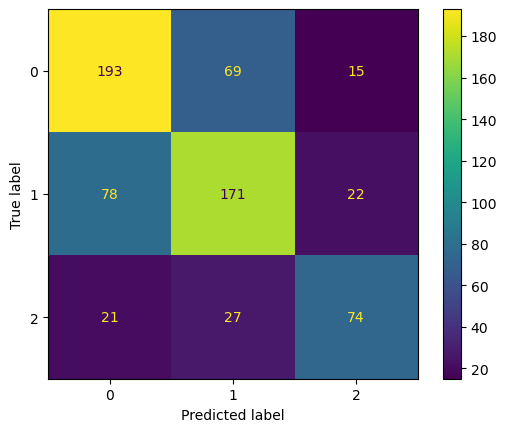

In [55]:
#plot confusion matrix
cm = confusion_matrix(y_test,classifier_Prediction)
displayMatrix = ConfusionMatrixDisplay(confusion_matrix=cm)
displayMatrix.plot()

In [56]:
#plot accuracy and precision and recall
print('Performance Report:\n')
print(classification_report(y_test,classifier_Prediction))

Performance Report:

              precision    recall  f1-score   support

           0       0.66      0.70      0.68       277
           1       0.64      0.63      0.64       271
           2       0.67      0.61      0.64       122

    accuracy                           0.65       670
   macro avg       0.66      0.64      0.65       670
weighted avg       0.65      0.65      0.65       670



Our final Naive Bayes model for financial sentiment analysis had an accuracy score of 70%. Beating our random baseline, while failing to reach our chosen literature baseline of 76%. It is good to see that the model here is only slightly off the study cited above, given the fact that different datasets were used.

## 7.4 BERT Base Model
https://www.geeksforgeeks.org/sentiment-classification-using-bert/

## DONT FORGET TO REFACTOR 

In [39]:
#import BERT transformer
import tensorflow as tf
from transformers import TFBertForSequenceClassification
from transformers import logging
from sklearn.model_selection import KFold

In [40]:
#optimizer, loss function, and metrics
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=2e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')

In [41]:
#function to build the bert model
def initialize_bert():
    #intialize model
    bert_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)
    bert_model.compile(optimizer=optimizer, loss=loss, metrics=[metric])    

    #stops the warnings and console logs from bert
    logging.set_verbosity_error() 
    
    return bert_model

In [46]:
%%time
#set the number of folds to 5, standard practise and shuffle the data
k_folds = KFold(n_splits=2,shuffle=True)

#store predictions to generate report
total_evaluation = []
total_true = []

fold_Count = 0

for train,test in k_folds.split(deep_X,deep_y):
    print("Fold:",fold_Count)
    model = initialize_bert()
    
    X_train_encoded = tokenizer.batch_encode_plus(deep_X[train],
                                              padding=True, 
                                              truncation=True,
                                              max_length = 128,
                                              return_tensors='tf')
 

    X_val_encoded = tokenizer.batch_encode_plus(deep_X[test], 
                                                  padding=True, 
                                                  truncation=True,
                                                  max_length = 128,
                                                  return_tensors='tf')
    #train our model and validate it
    history = model.fit(
    [X_train_encoded['input_ids'], X_train_encoded['token_type_ids'], X_train_encoded['attention_mask']],
    deep_y[train],
    validation_data=(
      [X_val_encoded['input_ids'], X_val_encoded['token_type_ids'], X_val_encoded['attention_mask']],
    deep_y[test]),
    batch_size=32,
    epochs=3)
    
    #evaluate model
    evaluation = model.predict(
     [X_val_encoded['input_ids'], X_val_encoded['token_type_ids'], X_val_encoded['attention_mask']])
    
    predicted_labels = np.argmax(evaluation.logits,axis=1)
    
    total_evaluation.extend(predicted_labels)
    total_true.extend(deep_y[test])
    
    fold_Count = fold_Count + 1
    

Fold: 0
Epoch 1/3
53/53 [==============================] - 177s 3s/step - loss: 1.0343 - accuracy: 0.5051 - val_loss: 0.9316 - val_accuracy: 0.5248
Epoch 2/3
53/53 [==============================] - 157s 3s/step - loss: 0.7369 - accuracy: 0.6707 - val_loss: 0.6013 - val_accuracy: 0.7496
Epoch 3/3
53/53 [==============================] - 42s 719ms/step
Fold: 1
Epoch 1/3
53/53 [==============================] - 193s 3s/step - loss: 1.0555 - accuracy: 0.5947 - val_loss: 1.0277 - val_accuracy: 0.3939
Epoch 2/3
53/53 [==============================] - 176s 3s/step - loss: 0.9296 - accuracy: 0.5290 - val_loss: 0.9842 - val_accuracy: 0.5392
Epoch 3/3
53/53 [==============================] - 38s 669ms/step
CPU times: total: 3h 8min 15s
Wall time: 18min 42s


In [47]:
print(classification_report(total_evaluation,total_true))

              precision    recall  f1-score   support

           0       0.75      0.78      0.76      1328
           1       0.77      0.73      0.75      1425
           2       0.72      0.74      0.73       593

    accuracy                           0.75      3346
   macro avg       0.75      0.75      0.75      3346
weighted avg       0.75      0.75      0.75      3346



Now to get the average accuracy and precision performance of the baseline model.

## 7.5 Overfitting BERT model

To develop an overfitting model and ascertain how big our production model needs to be, I will train the model for higher epochs, to the point where performance starts to decrease. We can monitor the performance by plotting the average validation accuracy per epoch on a chart(Chollet, 2018, p. 89).

In [ ]:
%%time
#set the number of folds to 5, standard practise and shuffle the data
k_folds = KFold(n_splits=5,shuffle=True)

#track each models history in the iteration
total_history = []

for train,test in k_folds.split(deep_X,deep_y):
    
    model = initialize_bert()
    
    X_train_encoded = tokenizer.batch_encode_plus(deep_X[train],
                                              padding=True, 
                                              truncation=True,
                                              max_length = 128,
                                              return_tensors='tf')
 

    X_val_encoded = tokenizer.batch_encode_plus(deep_X[test], 
                                                  padding=True, 
                                                  truncation=True,
                                                  max_length = 128,
                                                  return_tensors='tf')
    #train for 50 epochs
    history = model.fit(
    [X_train_encoded['input_ids'], X_train_encoded['token_type_ids'], X_train_encoded['attention_mask']],
    deep_y[train],
    validation_data=(
      [X_val_encoded['input_ids'], X_val_encoded['token_type_ids'], X_val_encoded['attention_mask']],
    deep_y[test]),
    batch_size=32,
    epochs=50)
    
    #append to history list
    total_history.append(history)

In [ ]:
#(Chollet, 2018, p. 89)
#Chapter 3.6.4 , Listing 3.29
val_acc_history = [hist.history['val_accuracy'] for hist in total_history]
avg_val_acc_history = [np.mean([x[i] for x in val_acc_history]) for i in range(OF_epochs)]

plt.plot(range(1,OF_epochs+1),avg_val_acc_history,color='red')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Avg Val Acc per Epoch')
plt.show()

## 7.6 BERT Hyperameter Tuning

The BERT authors[12] recommend fine-tuning for 4 epochs over the following hyperparameter options:
batch sizes: 8, 16, 32, 64
Learning rate (Adam): 5e-5, 3e-5, 2e-5

## 7.7 BERT Production Model

# 8 Evaluation

# 9 Conclusion

# 10 References

[1]  Seng, J.-L. and Yang, H.-F. (2017), "The association between stock price volatility and financial news – a sentiment analysis approach", Kybernetes, Vol. 46 No. 8, pp. 1341-1365. https://doi.org/10.1108/K-11-2016-0307 

[2] S. Sohangir, N. Petty and D. Wang, "Financial Sentiment Lexicon Analysis," 2018 IEEE 12th International Conference on Semantic Computing (ICSC), Laguna Hills, CA, USA, 2018, pp. 286-289, doi: 10.1109/ICSC.2018.00052.

[3] Devlin, J., Chang, M., Lee, K., & Toutanova, K. (2019). BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding. North American Chapter of the Association for Computational Linguistics.

[4] IBM (2023). What is supervised learning? [online] IBM. Available at: https://www.ibm.com/topics/supervised-learning.

[5] Wikipedia. (2020). BERT (language model). [online] Available at: https://en.wikipedia.org/wiki/BERT_(language_model).


[6] Ligozat A-L, Lefevre J, Bugeau A, Combaz J. Unraveling the Hidden Environmental Impacts of AI Solutions for Environment Life Cycle Assessment of AI Solutions. Sustainability. 2022; 14(9):5172. https://doi.org/10.3390/su14095172

[7] Ahmad, H.O., & Umar, S.U. (2023). Sentiment Analysis of Financial Textual data Using Machine Learning and Deep Learning Models. Informatica (Slovenia), 47 https://doi.org/10.31449/inf.v47i5.4673

[8] www.kaggle.com. (n.d.). Sentiment Analysis for Financial News. [online] Available at: https://www.kaggle.com/datasets/ankurzing/sentiment-analysis-for-financial-news/data.

[9] S. Yıldırım, D. Jothimani, C. Kavaklioğlu and A. Başar, "Deep Learning Approaches for Sentiment Analysis on Financial Microblog Dataset," 2019 IEEE International Conference on Big Data (Big Data), Los Angeles, CA, USA, 2019, pp. 5581-5584, doi: 10.1109/BigData47090.2019.9006056

[10] M. G. Sousa, K. Sakiyama, L. d. S. Rodrigues, P. H. Moraes, E. R. Fernandes and E. T. Matsubara, "BERT for Stock Market Sentiment Analysis," 2019 IEEE 31st International Conference on Tools with Artificial Intelligence (ICTAI), Portland, OR, USA, 2019, pp. 1597-1601, doi: 10.1109/ICTAI.2019.00231.

[11] Chollet, F. (2018). Deep Learning with Python. Shelter Island (New York, Estados Unidos): Manning, Cop.

[12] Devlin, J., Chang, M.-W., Lee, K. and Toutanova, K. (2018). BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding. [online] arXiv.org. Available at: https://arxiv.org/abs/1810.04805.